In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

plt.style.use('bmh')
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['axes.titlepad'] = 25
sns.set_color_codes('pastel')

In [14]:
orders = pd.read_csv('orders.csv', header = 0)
departments = pd.read_csv('departments.csv', header = 0)
products = pd.read_csv('products.csv', header = 0)
order_products_train = pd.read_csv('order_products__train.csv', header = 0)
order_products_prior = pd.read_csv('order_products__prior.csv', header = 0)
aisles = pd.read_csv('aisles.csv', header = 0)

In [15]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


C:\Users\rossr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


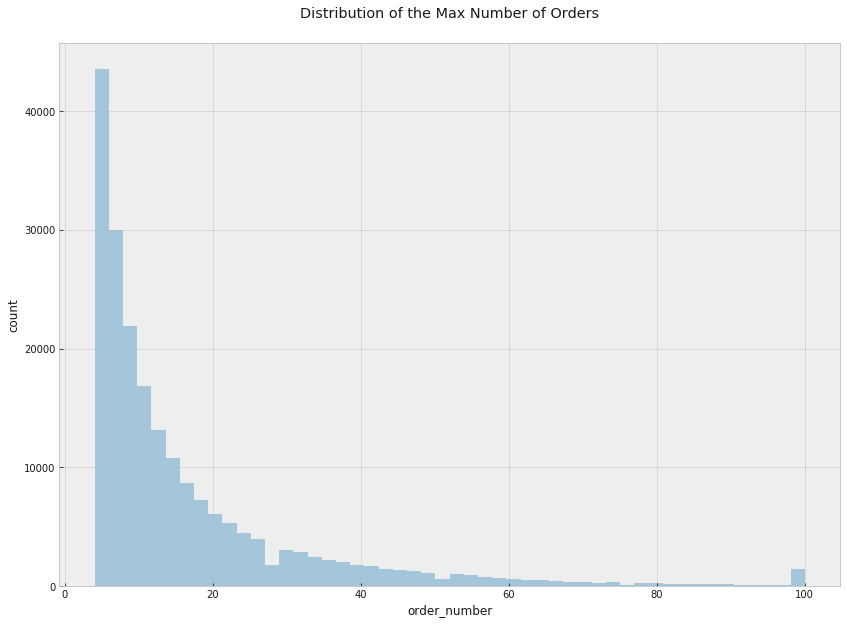

In [72]:
plt.title('Distribution of the Max Number of Orders')
plt.ylabel('count')
sns.distplot(orders.groupby('user_id').order_number.max(), kde = False, norm_hist = False)

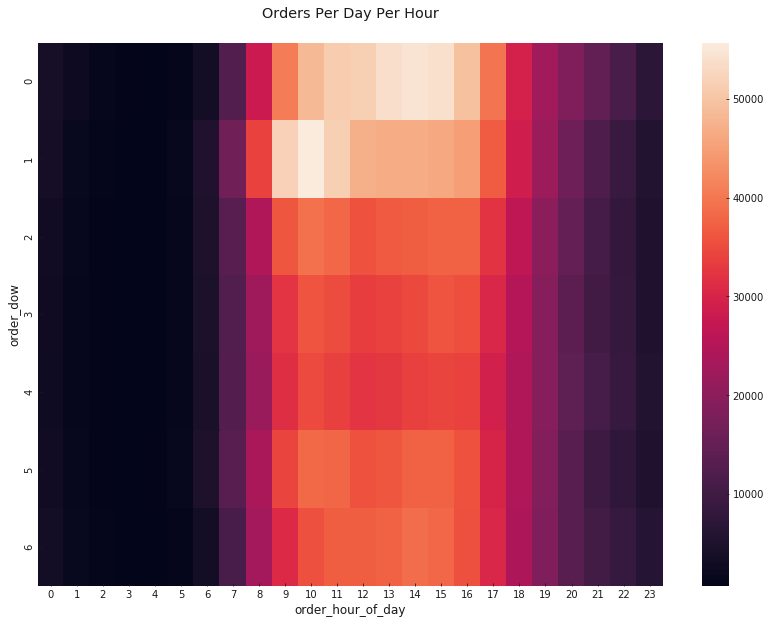

In [17]:
to_plot = pd.pivot_table(data = orders,
                         index = 'order_dow',
                         columns = 'order_hour_of_day',
                         values = 'order_id',
                         aggfunc = 'count')

plt.title('Orders Per Day Per Hour')
sns.heatmap(to_plot)

<BarContainer object of 32 artists>

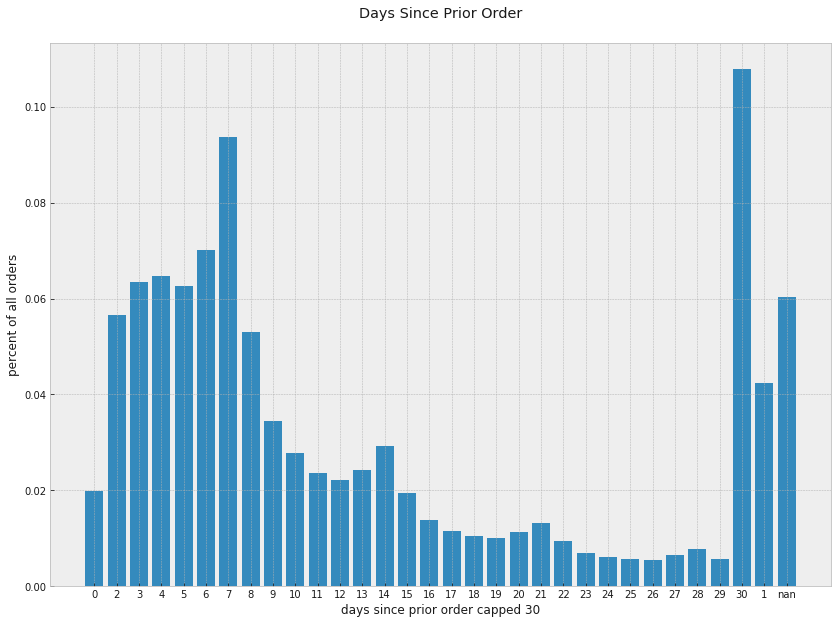

In [25]:
to_plot = orders.days_since_prior_order.value_counts(normalize = True, dropna = False, sort = False)
x_ticks = range(len(to_plot))
plt.xticks(x_ticks, [i if np.isnan(i) else int(i) for i in to_plot.index])
plt.title('Days Since Prior Order')
plt.xlabel('days since prior order capped 30')
plt.ylabel('percent of all orders')
plt.bar(x_ticks, to_plot)

<BarContainer object of 75 artists>

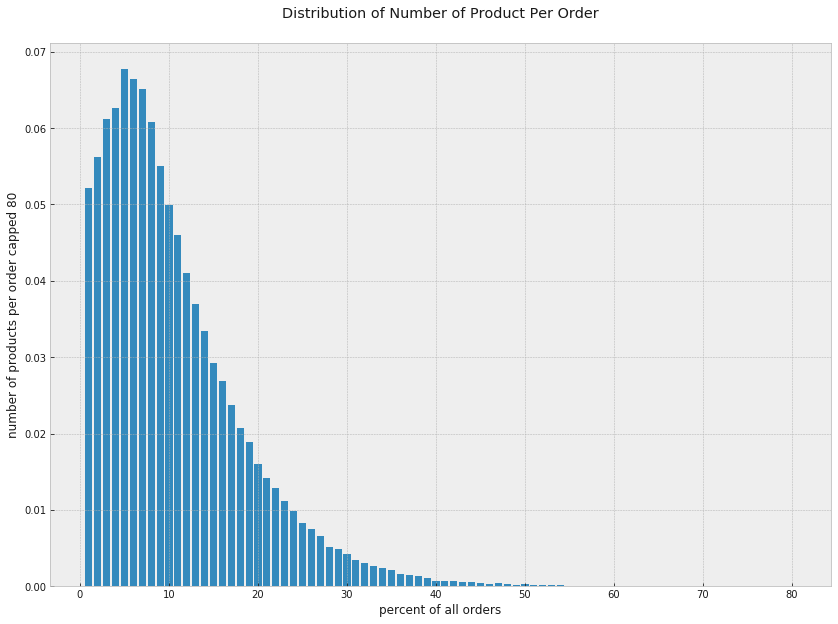

In [34]:
to_plot = order_products_train.groupby('order_id')\
.add_to_cart_order.max()\
.value_counts(normalize = True, dropna = False, sort = False)
plt.title('Distribution of Number of Product Per Order')
plt.xlabel('percent of all orders')
plt.ylabel('number of products per order capped 80')
plt.bar(to_plot.index, to_plot)

In [35]:
order_products_train_pivot = pd.pivot_table(data = order_products_train[order_products_train.add_to_cart_order <= 20],
                                            index = 'order_id',
                                            columns = 'add_to_cart_order',
                                            values = 'product_id',
                                            fill_value = 0)

In [36]:
order_products_train_pivot.head()

add_to_cart_order,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
order_id,,,,,,,,,,,,,,,,,,,,
1,49302,11109,10246,49683,43633,13176,47209,22035,0,0,0,0,0,0,0,0,0,0,0,0
36,39612,19660,49235,43086,46620,34497,48679,46979,0,0,0,0,0,0,0,0,0,0,0,0
38,11913,18159,4461,21616,23622,32433,28842,42625,39693,0,0,0,0,0,0,0,0,0,0,0
96,20574,30391,40706,25610,27966,24489,39275,0,0,0,0,0,0,0,0,0,0,0,0,0
98,8859,19731,43654,13176,4357,37664,34065,35951,43560,9896,27509,15455,27966,47601,40396,35042,40986,1939,46313,329


In [38]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [46]:
products_by_department = order_products_train.\
merge(right = products,
      how = 'left',
      left_on = 'product_id',
      right_on = 'product_id').\
merge(right = departments,
      how = 'left',
      left_on = 'department_id',
      right_on = 'department_id').\
merge(right = aisles,
      how = 'left',
      left_on = 'aisle_id',
      right_on = 'aisle_id').\
drop(['order_id',
      'add_to_cart_order',
      'reordered',
      'aisle_id',
      'department_id',
      'aisle_id'],
     axis = 1)

In [47]:
products_by_department.head()

,product_id,product_name,department,aisle
0,49302,Bulgarian Yogurt,dairy eggs,yogurt
1,11109,Organic 4% Milk Fat Whole Milk Cottage Cheese,dairy eggs,other creams cheeses
2,10246,Organic Celery Hearts,produce,fresh vegetables
3,49683,Cucumber Kirby,produce,fresh vegetables
4,43633,Lightly Smoked Sardines in Olive Oil,canned goods,canned meat seafood


<BarContainer object of 21 artists>

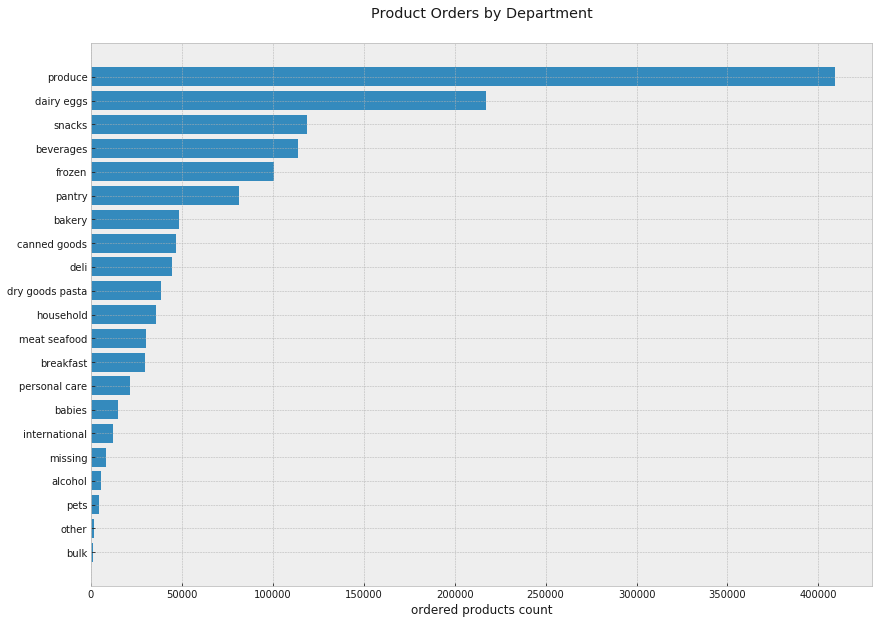

In [54]:
to_plot = products_by_department.department.value_counts(ascending = True)
plt.title('Product Orders by Department')
plt.xlabel('ordered products count')
plt.barh(to_plot.index, to_plot)

<BarContainer object of 20 artists>

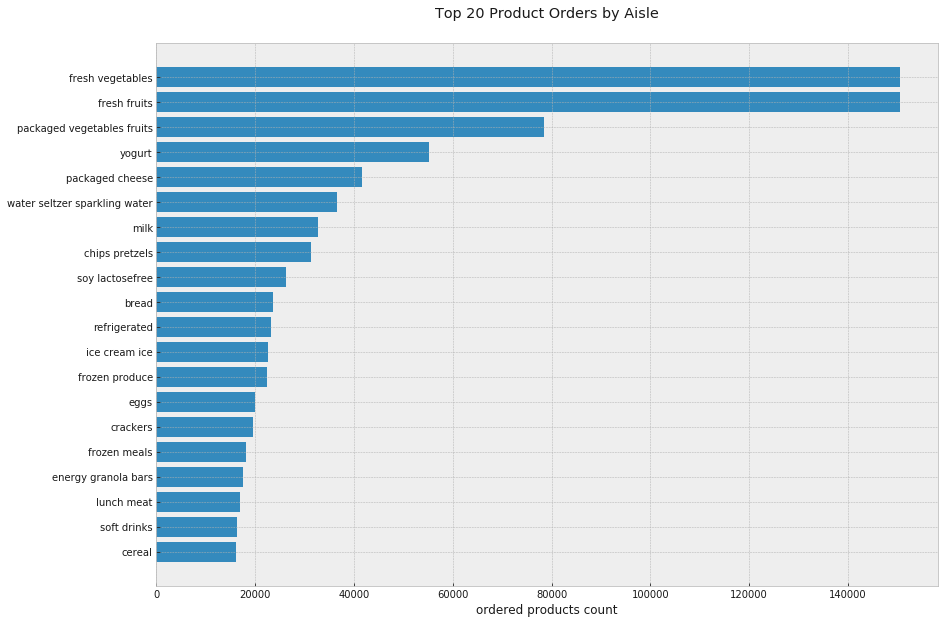

In [64]:
top_n = 20
to_plot = products_by_department.aisle.value_counts(ascending = True)
plt.title('Top %s Product Orders by Aisle' % top_n)
plt.xlabel('ordered products count')
plt.barh(to_plot.index[-top_n:], to_plot[-top_n:])

<BarContainer object of 40 artists>

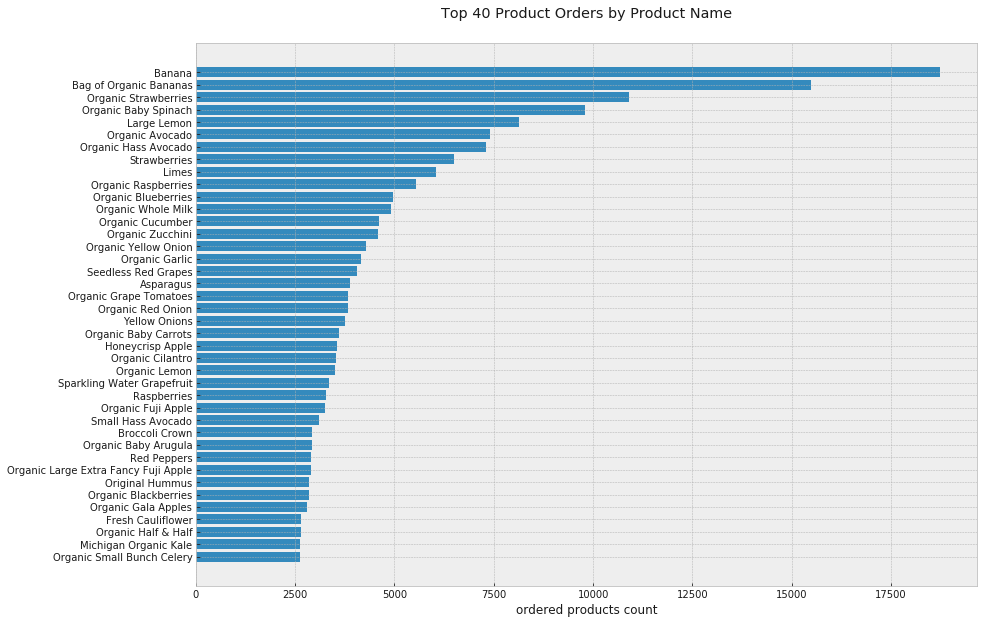

In [67]:
top_n = 40
to_plot = products_by_department.product_name.value_counts(ascending = True)
plt.title('Top %s Product Orders by Product Name' % top_n)
plt.xlabel('ordered products count')
plt.barh(to_plot.index[-top_n:], to_plot[-top_n:])

C:\Users\rossr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


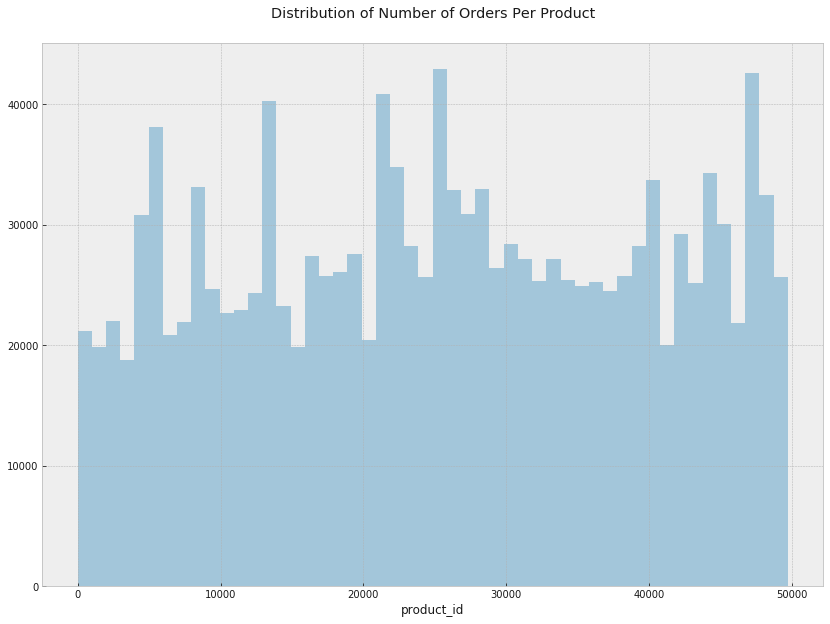

In [71]:
plt.title('Distribution of Number of Orders Per Product')
sns.distplot(products_by_department.product_id, kde = False, norm_hist = False)

In [80]:
#there are no common orders between order_products_train and order_products_prior
set(order_products_train.order_id.unique()) & set(order_products_prior.order_id.unique())

set()